In [13]:
!pip install numpy pandas matplotlib seaborn

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from math import pi
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,...,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot
count,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,...,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.00000,17790.000000,17790.000000,17790.000000
mean,9098.328162,213559.964193,25.277628,66.522597,71.447611,1603.820967,64.565037,55.693255,63.474030,63.929005,...,55.378977,2.346824,45.527600,64.659865,63.120180,47.540585,65.26054,53.306802,42.865318,2.944744
std,5226.015053,30096.437141,4.616679,6.594204,6.053951,267.995952,14.939258,17.345995,14.770205,14.157723,...,17.194020,0.748867,21.273696,14.682636,15.910172,21.656064,12.58181,14.108885,17.634472,0.660417
min,0.000000,16.000000,16.000000,52.000000,52.000000,752.000000,12.000000,11.000000,14.000000,16.000000,...,2.000000,1.000000,3.000000,12.000000,12.000000,2.000000,17.00000,10.000000,4.000000,1.000000
25%,4580.250000,199744.250000,22.000000,62.000000,67.000000,1470.000000,57.000000,44.000000,55.000000,56.000000,...,45.000000,2.000000,24.000000,57.000000,56.000000,26.000000,58.00000,44.000000,30.000000,3.000000
50%,9101.500000,220946.000000,25.000000,66.000000,71.000000,1640.000000,67.000000,58.000000,66.000000,66.000000,...,59.000000,2.000000,52.000000,67.000000,66.000000,55.000000,66.00000,55.000000,44.000000,3.000000
75%,13622.750000,235633.750000,29.000000,71.000000,75.000000,1788.000000,75.000000,69.000000,74.000000,74.000000,...,68.000000,3.000000,64.000000,75.000000,74.000000,66.000000,74.00000,64.000000,57.000000,3.000000
max,18144.000000,246264.000000,45.000000,94.000000,95.000000,2346.000000,97.000000,95.000000,96.000000,96.000000,...,95.000000,5.000000,91.000000,96.000000,96.000000,93.000000,97.00000,94.000000,90.000000,5.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl',
       'Body Type', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'Composure',
       'Contract Valid Until', 'Crossing', 'Curve', 'Dribbling', 'FKAccuracy',
       'Finishing', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'GKReflexes', 'HeadingAccuracy', 'Interceptions',
       'International Reputation', 'Jersey Number', 'Joined', 'Jumping', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Loaned From',
       'LongPassing', 'LongShots', 'Marking', 'Penalties', 'Position',
       'Positioning', 'Preferred Foot', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB', 'Reactions', 'Real Face', 'Release Clause',
       'ST', 'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
       'SprintSpeed', 'Stamina', '

In [6]:
positions = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB']

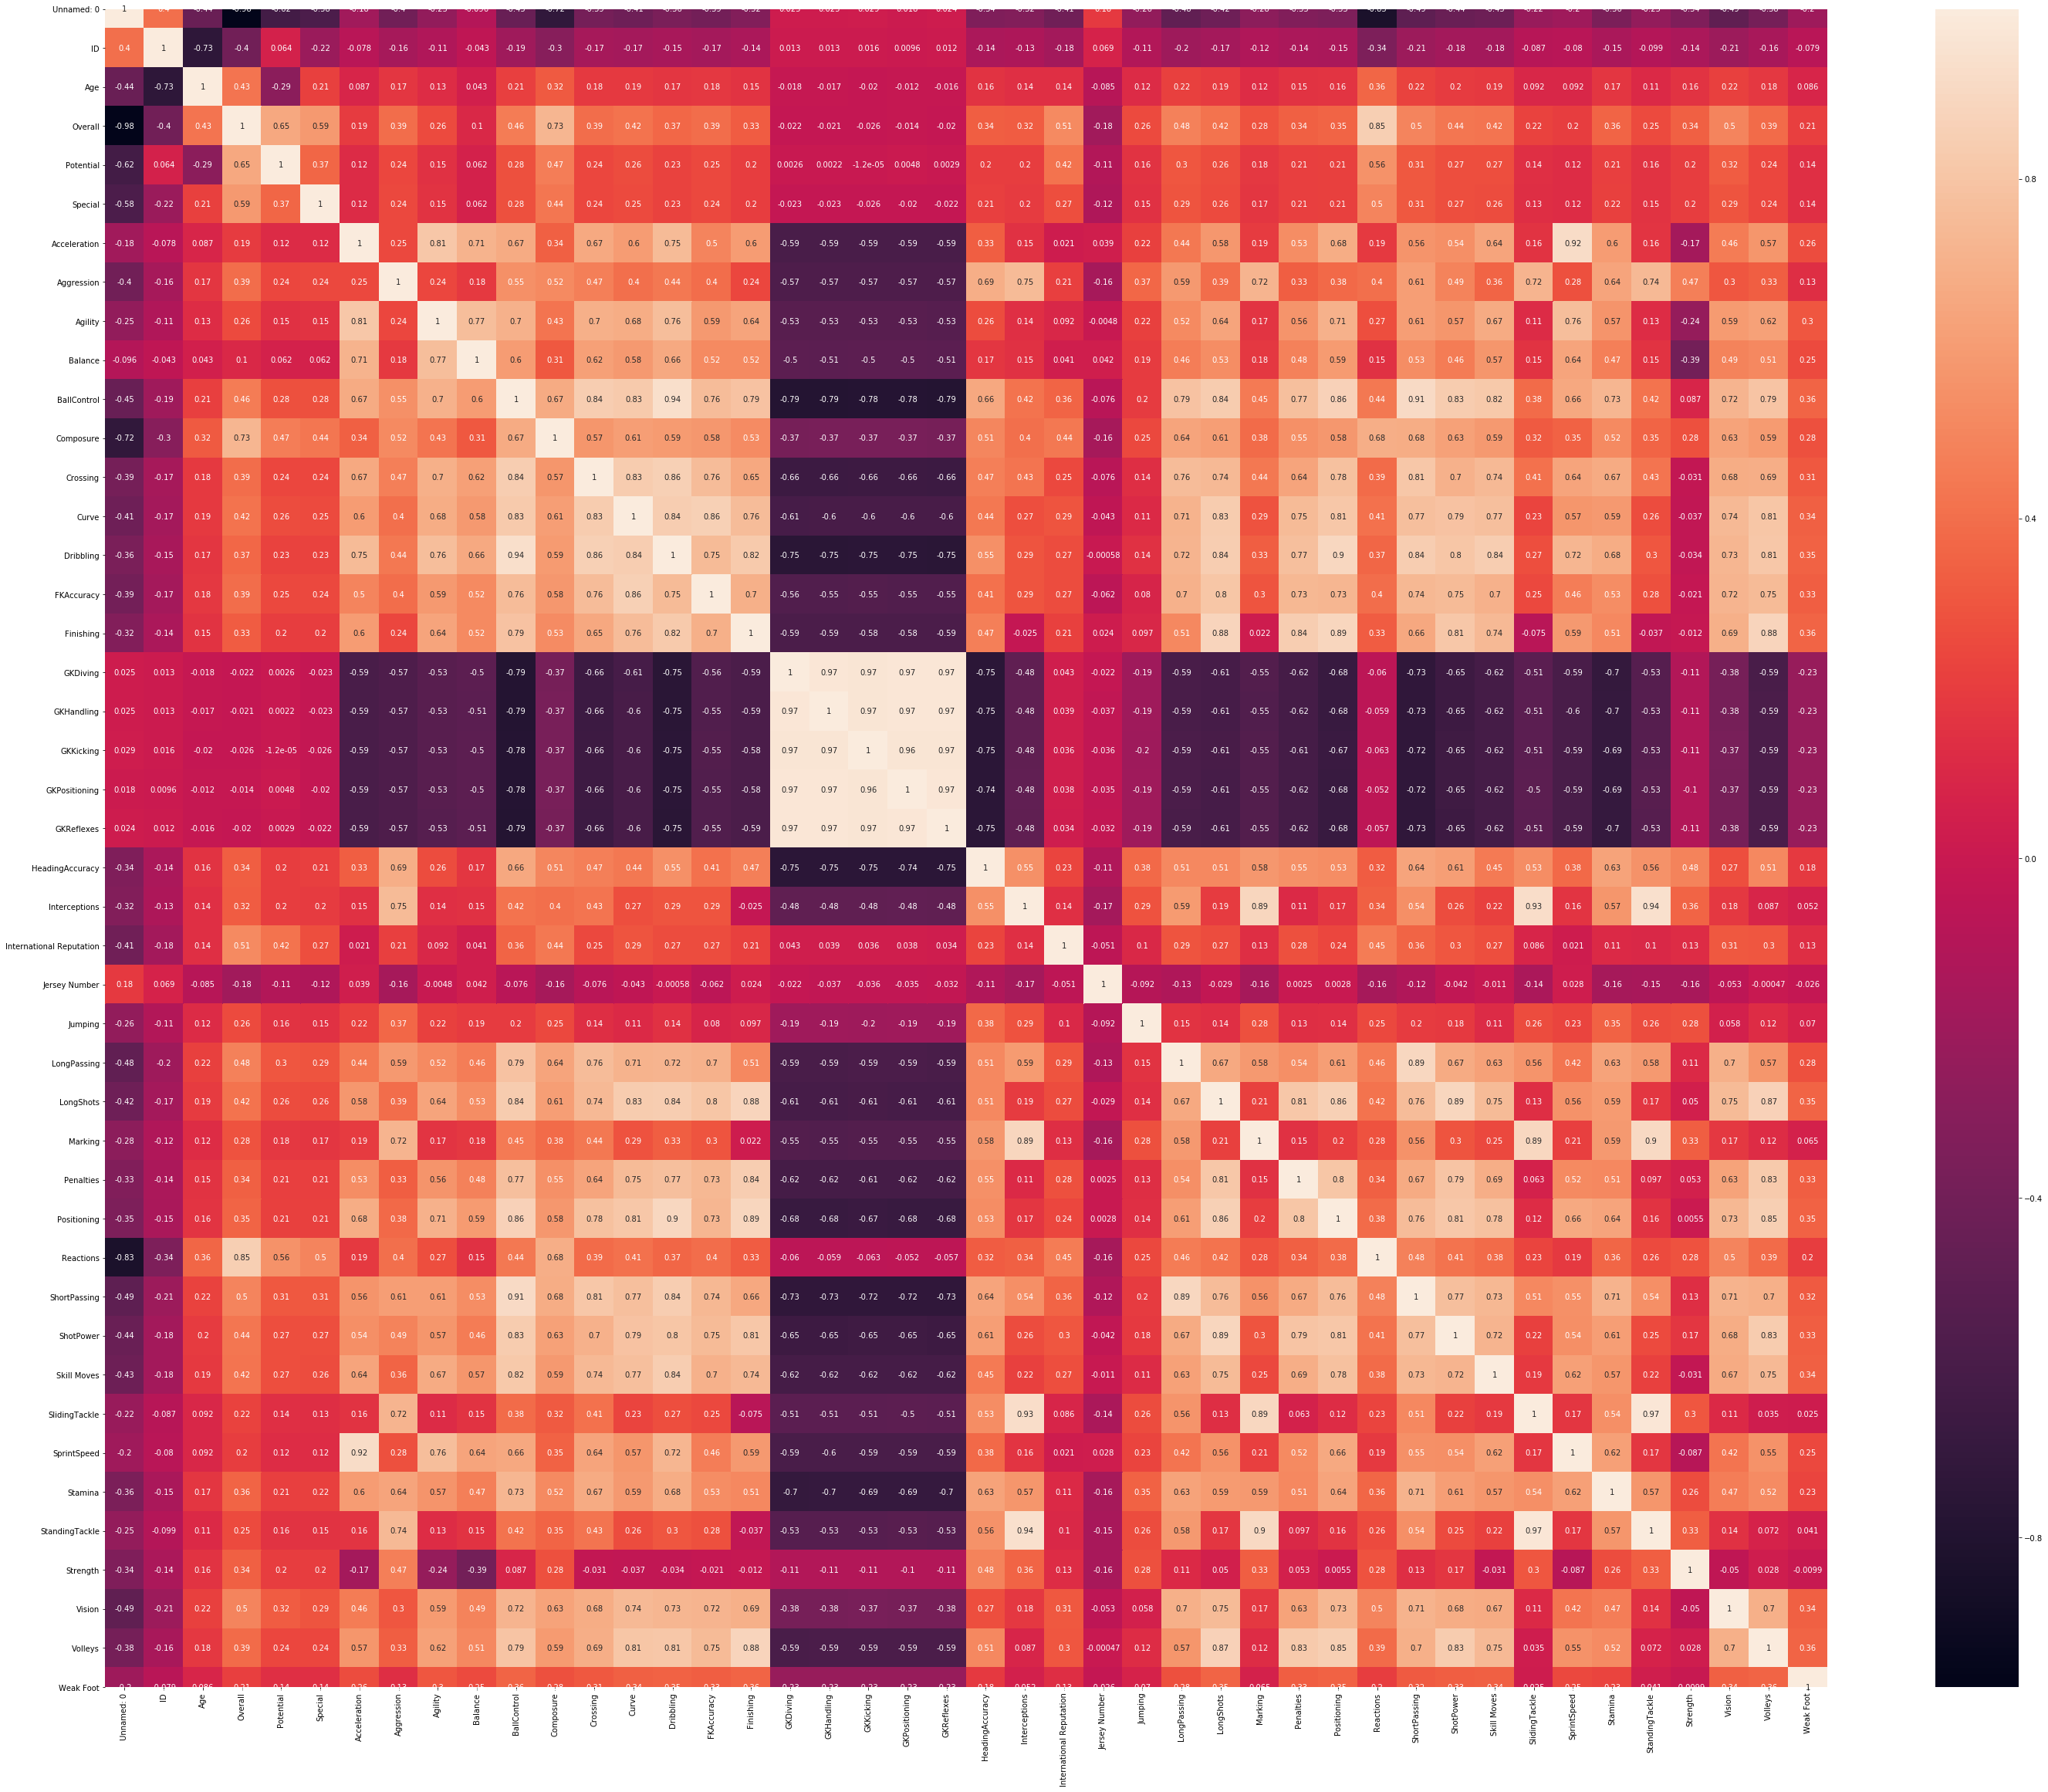

In [7]:
plt.figure(figsize=(50,40))
sns.heatmap(df.corr(), annot=True)


In [8]:
#Categorizing positions into 3 main categories 1.Defenders  2.Midfielders  3.Attackers
pos_field = {'Def': re.findall(r"\wB|\w\wB",str([x for x in positions])),
            'Mid': re.findall(r"\wM|\w\wM",str([x for x in positions])),
            'Att': list(set(re.findall(r"\wS|\wF|\wW",str([x for x in positions]))))}

In [9]:
#User input for Top 10 players by position
inputs_good = 0
while inputs_good==0:
    #user_input = input('Enter the position you want top players for: ')    #was trying to get user_input from user but faced difficulty when Kaggle runs the whole kernel
    user_input = 'CAM' 
    input_list = user_input.split(',')

    search = []
    for i in input_list:
        search.append(i.strip().upper())
    inputs_good = all(elem in positions for elem in search)
    if inputs_good:
        print('User wants to search for Top 10: ', ", ".join(search))
    else:
        print('Invalid position. Please re-enter the position (e.g. RAM, CF, CDM)')

User wants to search for Top 10:  CAM


In [10]:
for i in search:
    print('\n\n','Top 10', i, 'in FIFA 19', '\n')
    print(df.sort_values(i, ascending=False).head(10)[['Name', 'Nationality', 'Club', 'Overall']])



 Top 10 CAM in FIFA 19 

                 Name Nationality                 Club  Overall
0            L. Messi   Argentina         FC Barcelona       94
5           E. Hazard     Belgium              Chelsea       91
2           Neymar Jr      Brazil  Paris Saint-Germain       92
1   Cristiano Ronaldo    Portugal             Juventus       94
4        K. De Bruyne     Belgium      Manchester City       91
6           L. Modrić     Croatia          Real Madrid       91
16          P. Dybala   Argentina             Juventus       89
33           Coutinho      Brazil         FC Barcelona       88
55            Iniesta       Spain          Vissel Kobe       87
50         D. Mertens     Belgium               Napoli       87


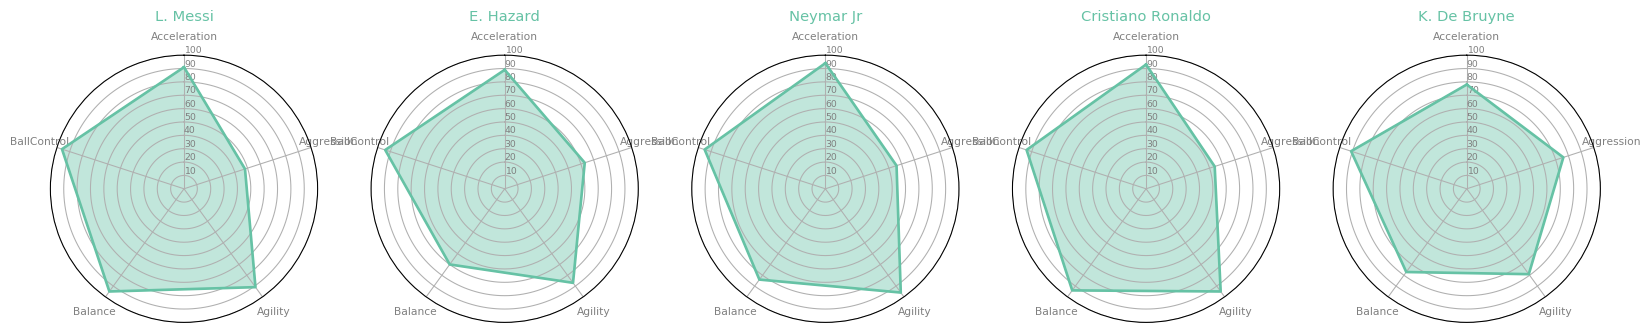

In [11]:
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(row, df, title, color):
    categories=list(df)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(1,5,row+1, polar=True )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30, 40, 50, 60, 70, 80,90,100], ['10', '20', '30', '40', '50', '60', '70', "80","90","100"], color="grey", size=7)
    plt.ylim(0,100)
    
    # Ind1
    values=df.loc[row].drop('Name').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
    
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
plt.tight_layout()    

df0 = df.sort_values(by=search[0], ascending=False).head(5).reset_index()
df_spider = df0[['Name', 'Overall', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl']].sort_values(by='Overall', ascending=False).head(5).reset_index()
df_spider.drop(columns=['index', 'Overall'], axis=1, inplace=True)

for row in range(len(df_spider.index)):
    make_spider( row=row, df=df_spider, title=df0['Name'][row], color=my_palette(row))

In [12]:
#printing all the top 10 players by position for reference
for i in positions:
    print('\n\n','Top 10', i, 'in FIFA 19', '\n')
    print(df.sort_values(i, ascending=False).head(10).reset_index()[['Name', 'Nationality', 'Club', 'Overall']])



 Top 10 CAM in FIFA 19 

                Name Nationality                 Club  Overall
0           L. Messi   Argentina         FC Barcelona       94
1          E. Hazard     Belgium              Chelsea       91
2          Neymar Jr      Brazil  Paris Saint-Germain       92
3  Cristiano Ronaldo    Portugal             Juventus       94
4       K. De Bruyne     Belgium      Manchester City       91
5          L. Modrić     Croatia          Real Madrid       91
6          P. Dybala   Argentina             Juventus       89
7           Coutinho      Brazil         FC Barcelona       88
8            Iniesta       Spain          Vissel Kobe       87
9         D. Mertens     Belgium               Napoli       87


 Top 10 CB in FIFA 19 

            Name Nationality               Club  Overall
0       D. Godín     Uruguay    Atlético Madrid       90
1   Sergio Ramos       Spain        Real Madrid       91
2   G. Chiellini       Italy           Juventus       89
3     M. Hummels     Germa